In [2]:
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
# from scipy.optimize      import fsolve, curve_fit
# from scipy.integrate     import odeint, quad
# from scipy.interpolate   import interp1d
# from scipy.misc          import derivative
# import scipy.constants   as const
# import sympy             as sp
# sp.init_printing()
# import glob
# import time
import pint; un = pint.UnitRegistry()

In [3]:
η = .35
HHV = 2.486e6*un.kJ/un.kmol
n   = 4.995*un.kmol/un.hr

Heat = η*HHV*n
print(f"Heat available from burning waste stream {Heat.to(un.kW):.3f}")

Pprop = 3.318*un.kW
Pbenz = 6.127*un.kW
PDC1B = 1.812*un.kW
PDC2T = 1.770*un.kW
PDC2B = 1*un.kW
Prec  = 16.95*un.kW

Qreact = 1889*un.kW #cooling
Qflash = 2239*un.kW #cooling
QDC1c  = 5946*un.kW #cooling
QDC1r  = 6389*un.kW #heating
QDC2c  = 2239*un.kW #cooling
QDC2r  = 2296*un.kW #heating
Qut    = 2296*un.kW #heating

ElecUtility = (Pprop+Pbenz+PDC1B+PDC2T+PDC2B+Prec)
CoolingWater = (Qreact+Qflash+QDC1c+QDC2c)
HeatingWater = (QDC1r+QDC2r+Qut)-Heat

Qsave = 1.977e7*un.kJ/un.hr
print(f"Heat saved using integration {Qsave.to(un.kW):.3f}")

CostCool = .378/un.GJ #dollar/GJ
CostElec = 18.72/un.GJ
CostHot  = 6/un.GJ

CostPerYearElec = ElecUtility*CostElec 
CostPerYearCool = CoolingWater*CostCool
CostPerYearHot  = HeatingWater*CostHot

print(f"Electrical Utility Cost = {CostPerYearElec.to(1/un.year):.3f}")
print(f"Cooling Water Utility Cost = {CostPerYearCool.to(1/un.year):.3f}")
print(f"Hot Water Utility Cost = {CostPerYearHot.to(1/un.year):.3f}")


CostUtilTot = CostPerYearElec+CostPerYearCool+CostPerYearHot

print(f"Total Utility Cost = {CostUtilTot.to(1/un.year):.3e}")



Heat available from burning waste stream 1207.264 kilowatt
Heat saved using integration 5491.667 kilowatt
Electrical Utility Cost = 18299.919 / year
Cooling Water Utility Cost = 146878.979 / year
Hot Water Utility Cost = 1850613.954 / year
Total Utility Cost = 2.016e+06 / year


In [15]:
MoneySavedCool = Qsave*CostCool
MoneySavedHot  = Qsave*CostHot

TotQSave = 2*Qsave
print(f"Heat saved from heat integration = {TotQSave.to(un.MW)}")

TotalMoneySavedIntegration = MoneySavedCool+MoneySavedHot

print(f"Heat saved from heat integration = {TotalMoneySavedIntegration.to(1/un.year)}")

MoneySavedBurning = Heat*CostHot

print(f"Money saved from burning waste = {MoneySavedBurning.to(1/un.year)}")

Heat saved from heat integration = 10.983333333333333 megawatt
Heat saved from heat integration = 1105331.7639600001 / year
Money saved from burning waste = 228590.07910200002 / year


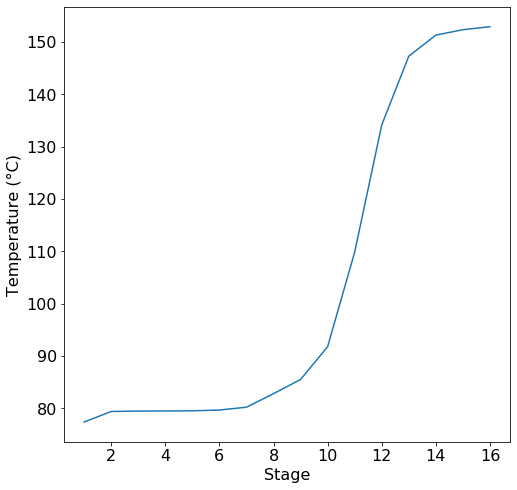

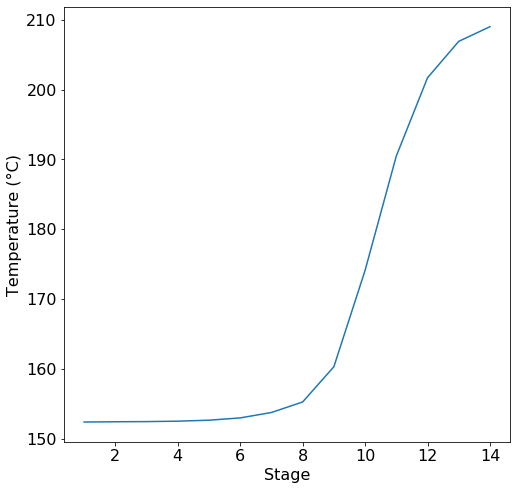

In [12]:
TProfCol1 = np.array([77.4158605673803
,79.4287965820390
,79.5089994785109
,79.5220017243747
,79.5605295375175
,79.7037406919247
,80.2483210682282
,82.8347279017394
,85.5414259426653
,91.7958462576113
,109.863392531311
,134.137084964559
,147.271639954696
,151.295818332398
,152.321237562468
,152.900006934474])

TrayProfCol1 = np.linspace(1,16,16)


plt.figure(figsize = (8,8))
plt.plot(TrayProfCol1,TProfCol1)
plt.ylabel('Temperature (°C)', fontsize = 16)
plt.xlabel('Stage', fontsize = 16)
#plt.title('Temperature Profile Column 1', fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.savefig('TempProfileColumn1.jpg')


TProfCol2 = np.array([152.378816946448
,152.418796481959
,152.441164685006
,152.500838100753
,152.641855519326
,152.970395776534
,153.744856298808
,155.254529647537
,160.295523369220
,174.099226513577
,190.471179075747
,201.684722770311
,206.899589022496
,209.000024994000])

TrayProfCol2 = np.linspace(1,14,14)
#Ticks = np.linspace(1,21,6)


plt.figure(figsize = (8,8))
plt.plot(TrayProfCol2,TProfCol2)
plt.ylabel('Temperature (°C)', fontsize = 16)
plt.xlabel('Stage', fontsize = 16)
#plt.title('Temperature Profile Column 2', fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.savefig('TempProfileColumn2.jpg')